In [1]:
%load_ext sql

In [2]:
%sql duckdb://

Connecting to 'duckdb://'

In [3]:
%%sql
CREATE TABLE diamonds AS SELECT * FROM 'diamonds.csv'

Running query in 'duckdb://'

Count
53940


In [4]:
%sql SELECT * FROM diamonds

Running query in 'duckdb://'

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39


In [11]:
%%sql 
SELECT AVG(carat), cut, color, clarity, AVG(depth),  AVG(price), AVG(x), AVG(y), AVG(z) 
    FROM  diamonds GROUP By cut, color, clarity ORDER BY cut DESC

Running query in 'duckdb://'

avg(carat),cut,color,clarity,avg(depth),avg(price),avg(x),avg(y),avg(z)
0.7723346303501946,Very Good,H,VS1,62.00466926070033,3750.1984435797667,5.677276264591437,5.704319066147857,3.527782101167315
1.4625,Very Good,J,I1,61.737500000000004,4478.375,7.1812499999999995,7.18625,4.43375
0.9854146341463416,Very Good,I,VS1,61.94780487804875,5276.970731707317,6.1474634146341485,6.169317073170731,3.812048780487801
0.49373563218390776,Very Good,F,VVS1,61.545977011494294,2826.5402298850577,4.886954022988505,4.916781609195402,3.0170689655172427
1.2107692307692308,Very Good,F,I1,61.56153846153847,4252.923076923077,6.7176923076923085,6.714615384615385,4.125384615384616
0.765263157894737,Very Good,J,VVS1,61.68421052631579,3175.5263157894738,5.6615789473684215,5.708421052631579,3.513157894736842
0.6506953642384117,Very Good,G,VVS2,61.82152317880793,3711.7847682119204,5.34847682119205,5.381158940397345,3.316158940397355
1.1405434782608694,Very Good,J,VS2,61.86847826086957,5325.548913043478,6.48010869565217,6.513750000000001,4.0175
0.5833714285714285,Very Good,D,VS1,61.55314285714281,2955.48,5.216799999999999,5.25034285714286,3.220114285714286
0.7857594936708836,Very Good,G,SI1,61.9635021097046,3481.8713080168777,5.731265822784808,5.761729957805904,3.5608227848101244


Removing NULLs, if there exists any from color

<Axes: title={'center': 'diamonds'}, xlabel='color', ylabel='Count'>

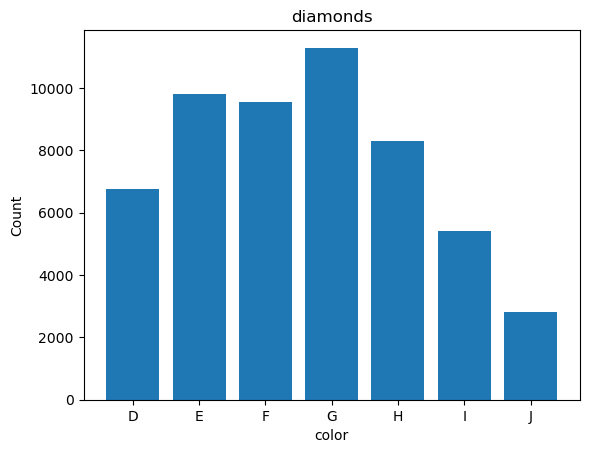

In [12]:
%sqlplot bar --table diamonds --column color

<Axes: title={'center': "'price' from 'diamonds'"}, xlabel='price', ylabel='Count'>

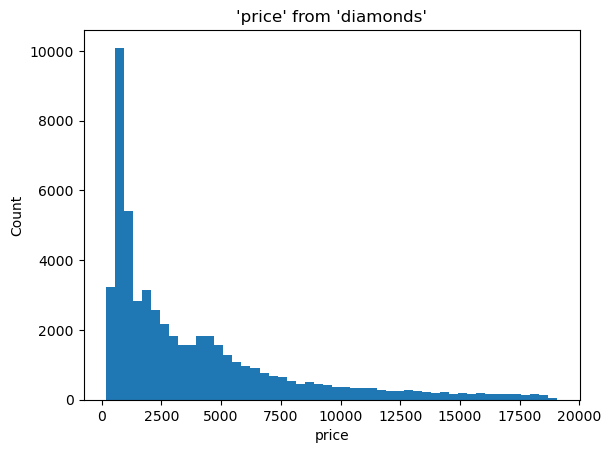

In [14]:
%sqlplot histogram --table diamonds --column price

Removing NULLs, if there exists any from color

<Axes: title={'center': 'diamonds'}>

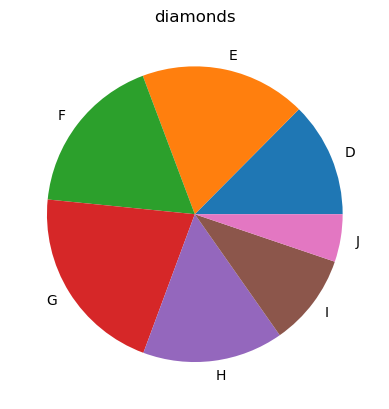

In [15]:
%sqlplot pie --table diamonds --column color 

In [21]:
from sql.ggplot import ggplot, aes, geom_boxplot, geom_histogram, facet_wrap

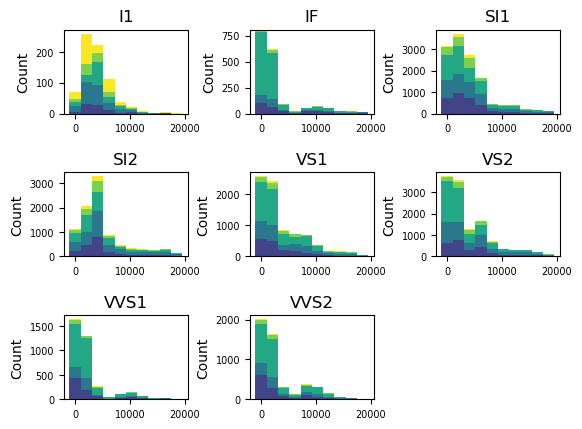

In [25]:
(
    ggplot("diamonds", aes(x="price"))
    + geom_histogram(bins=10, fill="cut")
    + facet_wrap("clarity", legend=False)
)